In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/home/sj1328/Downloads/intern_questions/intern_questions/customer_order_history.csv', parse_dates=['orderDate'])

In [6]:
df.head(3)

,orderId,customerId,amount,orderDate
0,52588944,58063,0,2018-03-20 06:52:06
1,52588946,367770,945,2018-03-20 08:55:40
2,52588942,9328591,1956,2018-03-20 09:32:21


In [7]:
df.head(8)

,orderId,customerId,amount,orderDate
0,52588944,58063,0,2018-03-20 06:52:06
1,52588946,367770,945,2018-03-20 08:55:40
2,52588942,9328591,1956,2018-03-20 09:32:21
3,52588945,0,0,2018-03-20 09:37:42
4,52588955,61093,2185,2018-03-21 08:25:58
5,52588954,9967,1395,2018-03-21 10:13:10
6,52588951,1824757,1058,2018-03-21 10:27:48
7,52588952,9328592,808,2018-03-21 10:32:37


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 4 columns):
orderId       3090 non-null int64
customerId    3090 non-null int64
amount        3090 non-null int64
orderDate     3090 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 96.6 KB


In [9]:
print(df['orderDate'].min(), df['orderDate'].max())

2018-03-20 06:52:06 2019-04-18 02:18:06


In [10]:
sd = dt.datetime(2020,1,1)

In [11]:
df['hist'] = sd - df['orderDate']

In [12]:
df['hist'].astype('timedelta64[D]')

0       651.0
1       651.0
2       651.0
3       651.0
4       650.0
5       650.0
6       650.0
7       650.0
8       650.0
9       649.0
10      649.0
11      649.0
12      649.0
13      649.0
14      648.0
15      648.0
16      648.0
17      648.0
18      647.0
19      647.0
20      647.0
21      647.0
22      647.0
23      647.0
24      647.0
25      647.0
26      647.0
27      646.0
28      646.0
29      646.0
        ...  
3060    259.0
3061    259.0
3062    259.0
3063    258.0
3064    258.0
3065    258.0
3066    258.0
3067    258.0
3068    258.0
3069    258.0
3070    258.0
3071    258.0
3072    258.0
3073    258.0
3074    258.0
3075    258.0
3076    258.0
3077    258.0
3078    258.0
3079    258.0
3080    258.0
3081    258.0
3082    258.0
3083    258.0
3084    258.0
3085    258.0
3086    257.0
3087    257.0
3088    257.0
3089    257.0
Name: hist, Length: 3090, dtype: float64

In [13]:
df['hist'] = df['hist'] / np.timedelta64(1,'D')

In [14]:
df.head()

,orderId,customerId,amount,orderDate,hist
0,52588944,58063,0,2018-03-20 06:52:06,651.713819
1,52588946,367770,945,2018-03-20 08:55:40,651.628009
2,52588942,9328591,1956,2018-03-20 09:32:21,651.602535
3,52588945,0,0,2018-03-20 09:37:42,651.598819
4,52588955,61093,2185,2018-03-21 08:25:58,650.648634


In [15]:
df = df[df['hist'] < 630]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977 entries, 113 to 3089
Data columns (total 5 columns):
orderId       2977 non-null int64
customerId    2977 non-null int64
amount        2977 non-null int64
orderDate     2977 non-null datetime64[ns]
hist          2977 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 139.5 KB


In [17]:
rfmTable = df.groupby('customerId').agg({'hist' : lambda x:x.min(), 'customerId': lambda x : len(x), 'amount': lambda x:x.sum()})

In [18]:
rfmTable.rename(columns={'hist': 'recency', 'customerId': 'frequency', 'amount': 'monetary_value'}, inplace=True)

In [19]:
rfmTable.head()

,recency,frequency,monetary_value
customerId,,,
0,257.904097,311,264539
187,535.682917,2,1375
192,583.665093,1,1450
678,481.737292,2,2725
1095,618.678148,1,760


In [20]:
df[df['customerId']== 367770]

,orderId,customerId,amount,orderDate,hist
418,52589425,367770,650,2018-05-19 09:08:52,591.618843
864,52589903,367770,1645,2018-07-17 08:51:43,532.630752


In [21]:
df[df['customerId']== 0]


,orderId,customerId,amount,orderDate,hist
127,52589080,0,550,2018-04-13 10:21:09,627.568646
141,52589087,0,0,2018-04-15 11:20:14,625.527616
151,52589105,0,1956,2018-04-18 10:13:02,622.574282
169,52589124,0,2898,2018-04-20 08:56:19,620.627558
181,52589139,0,0,2018-04-21 09:07:00,619.620139
205,52589186,0,2472,2018-04-24 05:31:31,616.769780
209,52589179,0,1360,2018-04-24 09:18:40,616.612037
262,52589248,0,1050,2018-04-30 09:32:40,610.602315
290,52589281,0,650,2018-05-04 08:32:56,606.643796
327,52589312,0,2090,2018-05-08 09:49:29,602.590637


In [22]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])

In [23]:
print(quartiles, type(quartiles))


         recency  frequency  monetary_value
0.25  330.699711        1.0           550.0
0.50  427.567002        1.0          1050.0
0.75  527.581970        1.0          1950.0 <class 'pandas.core.frame.DataFrame'>


In [24]:
quartiles = quartiles.to_dict()

In [25]:
quartiles

{'recency': {0.25: 330.69971064814814,
  0.5: 427.5670023148148,
  0.75: 527.5819704861111},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 550.0, 0.5: 1050.0, 0.75: 1950.0}}

In [26]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [27]:
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [28]:
rfmSeg = rfmTable

In [31]:
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))

In [32]:
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))

In [33]:
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [34]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) + rfmSeg.F_Quartile.map(str) + rfmSeg.M_Quartile.map(str)

In [35]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customerId,,,,,,,
0,257.904097,311,264539,1,1,1,111
187,535.682917,2,1375,4,1,2,412
192,583.665093,1,1450,4,4,2,442
678,481.737292,2,2725,3,1,1,311
1095,618.678148,1,760,4,4,3,443


In [36]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'],ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customerId,,,,,,,
0,257.904097,311,264539,1,1,1,111
16185,259.871667,45,119472,1,1,1,111
397268,262.608796,17,53680,1,1,1,111
129991,276.766169,22,30782,1,1,1,111
253077,286.927627,15,27373,1,1,1,111
65160,320.853530,7,26385,1,1,1,111
130472,270.598738,12,20570,1,1,1,111
40034,302.905845,2,14760,1,1,1,111
472601,323.973032,5,13190,1,1,1,111


In [37]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    11645.786667
112     1584.700000
113      712.769231
141     4067.419355
142     1481.093750
143      770.254902
144      330.763975
211     6159.516484
212     1626.551724
213      814.666667
241     3831.387755
242     1456.554217
243      820.390000
244      401.538462
311     4719.357143
312     1500.400000
313      782.666667
314      108.000000
341     2979.469388
342     1498.123711
343      825.226891
344      370.203540
411     3683.190476
412     1640.062500
413      855.000000
414        0.000000
441     2977.408451
442     1477.299270
443      821.568807
444      292.494382
Name: monetary_value, dtype: float64

In [38]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] + rfmSeg['M_Quartile']

In [39]:
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 11952452
Data columns (total 8 columns):
recency           1862 non-null float64
frequency         1862 non-null int64
monetary_value    1862 non-null int64
R_Quartile        1862 non-null int64
F_Quartile        1862 non-null int64
M_Quartile        1862 non-null int64
RFMClass          1862 non-null object
Total Score       1862 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 130.9+ KB
               recency  frequency  monetary_value  R_Quartile  F_Quartile  \
customerId                                                                  
0           257.904097        311          264539           1           1   
187         535.682917          2            1375           4           1   
192         583.665093          1            1450           4           4   
678         481.737292          2            2725           3           1   
1095        618.678148          1             760        

In [40]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     11645.786667
4      5335.225225
5      3272.653061
6      3118.862745
7      2321.962963
8      1445.204167
9      1144.200000
10      950.977778
11      591.819820
12      292.494382
Name: monetary_value, dtype: float64

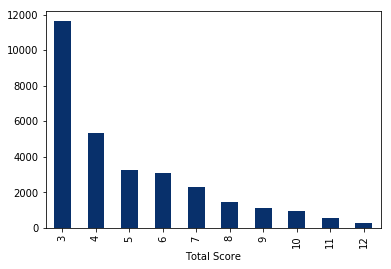

In [41]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

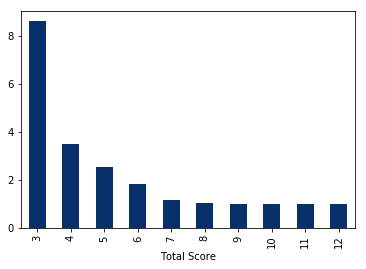

In [42]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

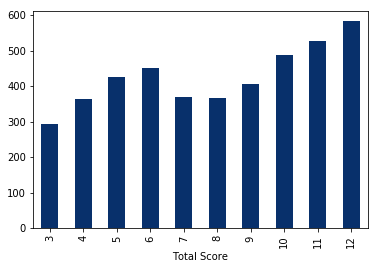

In [43]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')